## Functions provided

In [1]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [2]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [3]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [4]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

## Task

Implement a strand-aware naive exact matching algorithm. Look for occurences of the reverse complement of pattern in the text.

If the reverse complement and the original pattern is identical, a given match offset should be reported only once. This means the output of this function `naive_with_rc` should be identical to `naive` above.

## My function

In [5]:
def naive_with_rc(p, t):
    occurrences = naive(p,t)
    p_rev = reverseComplement(p)
    if p_rev != p:
        occurrences.extend(naive(p_rev, t))
    return occurrences

## Test examples

In [6]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [7]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [8]:
naive(p,t) # should be the same as above

[10, 24]

In [9]:
# Phi-X genome
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2020-07-24 14:16:42--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net... 143.204.192.189, 143.204.192.220, 143.204.192.149, ...
Connecting to d396qusza40orc.cloudfront.net|143.204.192.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: 'phix.fa.2'

phix.fa.2           100%[===================>]   5.40K  --.-KB/s    in 0s      

2020-07-24 14:16:42 (753 MB/s) - 'phix.fa.2' saved [5528/5528]



In [10]:
phix_genome = readGenome('phix.fa')
occurrences = naive_with_rc('ATTA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 62
# occurrences: 60


## Lambda genome

In [11]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2020-07-24 14:16:42--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net... 13.227.171.55, 13.227.171.82, 13.227.171.149, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|13.227.171.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: 'lambda_virus.fa.1'

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.04s   

2020-07-24 14:16:43 (1.06 MB/s) - 'lambda_virus.fa.1' saved [49270/49270]



In [12]:
lambda_genome = readGenome('lambda_virus.fa')

In [13]:
import collections
collections.Counter(lambda_genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

## Programming Homework 1

### Question 1

In [14]:
reverseComplement('AGGT')

'ACCT'

In [15]:
len(naive_with_rc('AGGT', lambda_genome))

306

### Question 2

In [16]:
len(naive_with_rc('TTAA', lambda_genome))

195

In [17]:
len(naive('TTAA', lambda_genome)) #double check, should be the same

195

### Question 3 & 4

In [18]:
min(naive_with_rc('ACTAAGT', lambda_genome))

26028

In [19]:
min(naive_with_rc('AGTCGA', lambda_genome))

450

### Question 5 & 6: allowing two mismatches

In [20]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match += 1
        if match <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [21]:
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [22]:
# more testing with phi-x genome
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 10
# occurrences: 79


In [23]:
# question 5
len(naive_2mm('TTCAAGCC', lambda_genome))

191

In [24]:
# question 6
min(naive_2mm('AGGAGGTT', lambda_genome))

49

### Question 7

In [25]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2020-07-24 14:16:44--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net... 13.227.171.55, 13.227.171.82, 13.227.171.149, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|13.227.171.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: 'ERR037900_1.first1000.fastq.1'

ERR037900_1.first10 100%[===================>] 235.96K   903KB/s    in 0.3s    

2020-07-24 14:16:44 (903 KB/s) - 'ERR037900_1.first1000.fastq.1' saved [241626/241626]



In [26]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

In [27]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [28]:
import numpy as np
scores = np.empty([len(quals), len(quals[0])])  # 1000 x 100 array

In [29]:
for i, qual in enumerate(quals):
    for j, phred in enumerate(qual):
        scores[i,j] = phred33ToQ(phred)

In [30]:
scores

array([[39., 39., 39., ..., 34., 27., 36.],
       [39., 39., 39., ...,  2.,  2.,  2.],
       [39., 39., 39., ...,  2.,  2.,  2.],
       ...,
       [31., 30., 31., ...,  2.,  2.,  2.],
       [39., 39., 39., ..., 17., 15., 22.],
       [38., 38., 38., ...,  2.,  2.,  2.]])

In [31]:
mean_scores = np.mean(scores, axis=0)

In [32]:
np.argmin(mean_scores)

66

In [33]:
np.min(mean_scores)

4.526

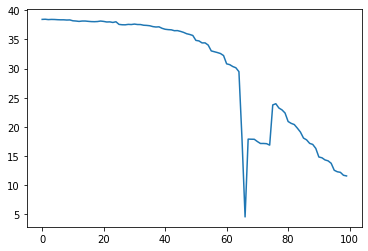

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(mean_scores)), mean_scores)
plt.show()